<a href="https://colab.research.google.com/github/kavya-avula/Fake_news_classification/blob/main/hindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn stopwordsiso indic-nlp-library --quiet
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from stopwordsiso import stopwords
from indicnlp.tokenize import indic_tokenize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

# Replace with your file name after upload
df = pd.read_csv("fake_news_hindi.csv")
df.head()


Saving fake_news_hindi.csv to fake_news_hindi (1).csv


,Unnamed: 0,text,label,wcount
0,0,‘मोदी के शासन के दौरान गंगा’ गंगा नदी नरेन्द्...,1,19
1,1,यह खबर आने से पहले छवि क्रेडिट जस्टिन सुलिवान/...,1,374
2,2,गुलाब गेंद वाल डे-नाइट टेस्ट मैच कप्ता विराट क...,0,20
3,3,उत्तर कोरिया रॉकेट प्रक्षेपण योजनाएं 71 0 15 0...,1,345
4,4,राष्ट्रपति डोनाल्ड ट्रम्प और प्रथम महिला मेलान...,0,180


In [ ]:
df.rename(columns={"news": "text", "label": "target"}, inplace=True)

In [ ]:
def clean_text(text):
    if isinstance(text, str):
        # Remove URLs, punctuation, digits, English words
        text = re.sub(r"http\S+|www\S+", "", text)
        text = re.sub(r"[a-zA-Z0-9]", "", text)
        text = re.sub(r"[^\u0900-\u097F\s]", "", text)  # Keep only Devanagari chars
        text = re.sub(r"\s+", " ", text).strip()
        return text
    else:
        return ""

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,Unnamed: 0,text,target,wcount,clean_text
0,0,‘मोदी के शासन के दौरान गंगा’ गंगा नदी नरेन्द्...,1,19,मोदी के शासन के दौरान गंगा गंगा नदी नरेन्द्र म...
1,1,यह खबर आने से पहले छवि क्रेडिट जस्टिन सुलिवान/...,1,374,यह खबर आने से पहले छवि क्रेडिट जस्टिन सुलिवानग...
2,2,गुलाब गेंद वाल डे-नाइट टेस्ट मैच कप्ता विराट क...,0,20,गुलाब गेंद वाल डेनाइट टेस्ट मैच कप्ता विराट को...
3,3,उत्तर कोरिया रॉकेट प्रक्षेपण योजनाएं 71 0 15 0...,1,345,उत्तर कोरिया रॉकेट प्रक्षेपण योजनाएं जापान दक्...
4,4,राष्ट्रपति डोनाल्ड ट्रम्प और प्रथम महिला मेलान...,0,180,राष्ट्रपति डोनाल्ड ट्रम्प और प्रथम महिला मेलान...


In [ ]:
hindi_stopwords = stopwords("hi")

def preprocess(text):
    tokens = indic_tokenize.trivial_tokenize(text)
    tokens = [t for t in tokens if t not in hindi_stopwords]
    return " ".join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['target'], test_size=0.2, random_state=42, stratify=df['target']
)


In [ ]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
model = LogisticRegression(max_iter=300)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=300)

In [ ]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7687591240875913

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81      1989
           1       0.78      0.63      0.69      1436

    accuracy                           0.77      3425
   macro avg       0.77      0.75      0.75      3425
weighted avg       0.77      0.77      0.76      3425


Confusion Matrix:
 [[1731  258]
 [ 534  902]]


In [ ]:
def predict_news(text):
    text = clean_text(text)
    text = preprocess(text)
    vector = tfidf.transform([text])
    prediction = model.predict(vector)[0]
    return "Fake News" if prediction == 1 else "Real News"

# Example
predict_news("प्रधानमंत्री ने कहा कि देश की अर्थव्यवस्था तेजी से बढ़ रही है।")

'Real News'

In [ ]:
# Colab install (run once)
!pip install -q transformers datasets sentence-transformers torch torchvision torchaudio scikit-learn joblib matplotlib seaborn


In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_recall_fscore_support, roc_auc_score, roc_curve,
                             PrecisionRecallDisplay)
from sentence_transformers import SentenceTransformer

# For optional transformer fine-tuning (comment out if you won't use):
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import torch


In [ ]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # remove urls
    text = re.sub(r"http\S+|www\S+", " ", text)
    # remove latin letters/digits
    text = re.sub(r"[A-Za-z0-9]", " ", text)
    # keep only Devanagari range + whitespace
    text = re.sub(r"[^\u0900-\u097F\s]", " ", text)
    # collapse spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# If you already have df loaded, apply:
# df = pd.read_csv("fake_news_hindi.csv")  # only if you haven't loaded df yet
df['clean_text'] = df['text'].astype(str).apply(clean_text)
print("Sample cleaned text:\n", df['clean_text'].head(3).to_list())


Sample cleaned text:
 ['मोदी के शासन के दौरान गंगा गंगा नदी नरेन्द्र मोदी के शाशन में कांग्रेस के मुकाबले काफ़ी स्वच्छ है', 'यह खबर आने से पहले छवि क्रेडिट जस्टिन सुलिवान गेटी द रियल एजेंडा न्यूज जेम्स ओकीफ के प्रोजेक्ट वेरिटास की जांच के परिणामस्वरूप डीएनसी ओबामा व्हाइट हाउस और हिलेरी क्लिंटन अभियान के बीच भ्रष्टाचार के कभी न खत्म होने वाले स्तर के बारे में अधिक विवरण सामने आए हैं। ट्रम्प की रैलियों में लोगों को बत्तख के रूप में तैयार करने के लिए प्रतीत होने वाले हानिरहित अभियानों को बढ़ावा देने से लेकर क्लिंटन अभियान डीएनसी और गैर लाभकारी संगठन अमेरिकन्स यूनाइटेड फॉर चेंज के बीच मिलीभगत तक भ्रष्ट आचरण शामिल हैं। प्रोजेक्ट वेरिटास द्वारा डाले गए तीसरे वीडियो में हिलेरी के साथियों ने कबूल किया कि कैसे वे उनके अभियान और डीएनसी के साथ समन्वय स्थापित करने में कामयाब रहे जिसे कम से कम ट्रम्प अभियान को परेशानी में डालने और भ्रष्टों को उकसाने के लिए उकसाने वाले कदम के रूप में वर्णित किया जा सकता है। मुख्यधारा की मीडिया ने ट्रम्प की रैलियों के बाहर हिंसक विस्फोटों के लिए उन्हें दोषी ठहराते हुए

In [ ]:
X = df['clean_text']
y = df['target'].astype(int)   # ensure integer labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train size:", len(X_train), "Test size:", len(X_test))
print("Class distribution in train:", np.bincount(y_train))


Train size: 13699 Test size: 3425
Class distribution in train: [7955 5744]


TFIDF + LR Accuracy: 0.7795620437956204

Classification Report:
               precision    recall  f1-score   support

           0     0.8051    0.8185    0.8118      1989
           1     0.7427    0.7256    0.7341      1436

    accuracy                         0.7796      3425
   macro avg     0.7739    0.7721    0.7729      3425
weighted avg     0.7790    0.7796    0.7792      3425



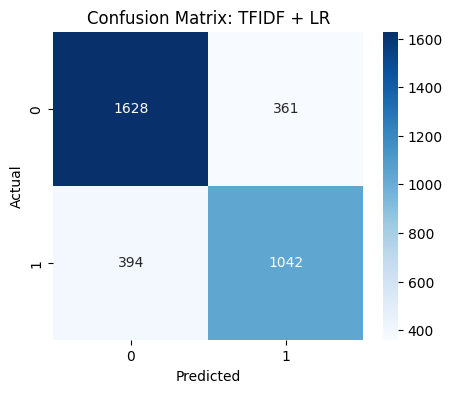

In [ ]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1,2), min_df=3)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf  = tfidf.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
lr.fit(X_train_tf, y_train)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test_tf)

print("TFIDF + LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, digits=4))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: TFIDF + LR')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Top features for fake (label=1) and real (label=0)
feature_names = tfidf.get_feature_names_out()
coefs = lr.coef_[0]
top_fake_idx = np.argsort(coefs)[-30:][::-1]  # top positive weights -> fake
top_real_idx = np.argsort(coefs)[:30]         # top negative weights -> real

print("Top features indicating FAKE news (top 20):")
print([feature_names[i] for i in top_fake_idx[:20]])

print("\nTop features indicating REAL news (top 20):")
print([feature_names[i] for i in top_real_idx[:20]])


Top features indicating FAKE news (top 20):
['अक बर', 'नव बर', 'यरल', 'तस', 'फ़र', 'ईम', 'यह', 'गय', 'टन', 'अक', 'मतद', 'अम', 'उपय', 'लड़क', 'नव', 'घट', 'ज़र', 'ग़लत', 'दरअसल', 'तव']

Top features indicating REAL news (top 20):
['टर पर', 'कह', 'रपत रम', 'इटब', 'जग', 'रणब', 'रपत', 'उन कह', 'उद टन', 'आज', 'अख', 'आरड', 'धभक', 'पर', 'एव', 'मल', 'ऑस', 'छत', 'आग कह', 'कह हम']


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/215 [00:00<?, ?it/s]

Batches:   0%|          | 0/54 [00:00<?, ?it/s]

SBERT + LR Accuracy: 0.724087591240876

Classification Report:
               precision    recall  f1-score   support

           0     0.7765    0.7371    0.7563      1989
           1     0.6597    0.7061    0.6821      1436

    accuracy                         0.7241      3425
   macro avg     0.7181    0.7216    0.7192      3425
weighted avg     0.7275    0.7241    0.7252      3425



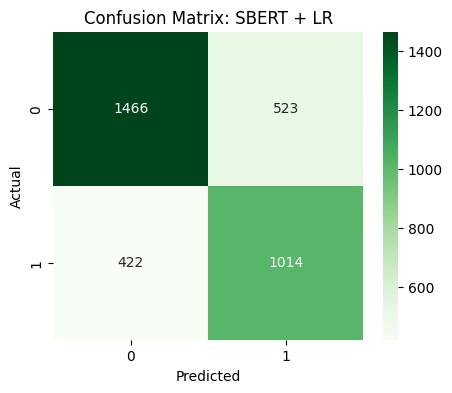

In [ ]:
# Choose a multilingual SBERT that supports Hindi well
embed_model_name = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
embedder = SentenceTransformer(embed_model_name)

# Encode (do in batches to avoid OOM)
X_train_list = X_train.tolist()
X_test_list  = X_test.tolist()
X_train_emb = embedder.encode(X_train_list, show_progress_bar=True, batch_size=64)
X_test_emb  = embedder.encode(X_test_list, show_progress_bar=True, batch_size=64)

# Train LR on embeddings
lr_emb = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
lr_emb.fit(X_train_emb, y_train)
y_pred_emb = lr_emb.predict(X_test_emb)

print("SBERT + LR Accuracy:", accuracy_score(y_test, y_pred_emb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_emb, digits=4))

# Confusion matrix
cm2 = confusion_matrix(y_test, y_pred_emb)
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: SBERT + LR')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


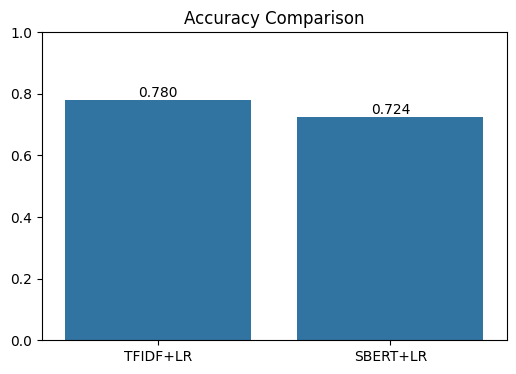

In [ ]:
acc_tfidf = accuracy_score(y_test, y_pred_lr)
acc_sbert  = accuracy_score(y_test, y_pred_emb)

models = ['TFIDF+LR', 'SBERT+LR']
accs = [acc_tfidf, acc_sbert]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accs)
plt.ylim(0,1)
plt.title('Accuracy Comparison')
for i, v in enumerate(accs):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()


In [ ]:
# Save TF-IDF pipeline and LR
joblib.dump(tfidf, "tfidf_vectorizer.joblib")
joblib.dump(lr, "tfidf_lr_model.joblib")

# Save SBERT & its LR classifier
# Note: SBERT is a separate model (python object) and cannot be saved with joblib in a portable manner,
# but you can save the LR classifier (weights) and note the SBERT model name to reload.
joblib.dump(lr_emb, "sbert_lr_model.joblib")

# Save embedding model name to reload later
with open("sbert_model_name.txt", "w") as f:
    f.write(embed_model_name)

print("Saved: tfidf_vectorizer.joblib, tfidf_lr_model.joblib, sbert_lr_model.joblib, sbert_model_name.txt")


Saved: tfidf_vectorizer.joblib, tfidf_lr_model.joblib, sbert_lr_model.joblib, sbert_model_name.txt


In [ ]:
from google.colab import files
files.download("tfidf_vectorizer.joblib")
files.download("tfidf_lr_model.joblib")
files.download("sbert_lr_model.joblib")
files.download("sbert_model_name.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
from google.colab import files

rename_map = {
    "tfidf_vectorizer.joblib": "hindi_vectorizer.pkl",
    "tfidf_lr_model.joblib": "hindi_model.pkl",
    "sbert_lr_model.joblib": "hindi_sbert_model.pkl",
    "sbert_model_name.txt": "hindi_sbert_model_name.txt"
}

for old, new in rename_map.items():
    if os.path.exists(old):
        os.rename(old, new)
        files.download(new)
        print(f"✅ Renamed and downloaded: {new}")
    else:
        print(f"⚠️ File not found: {old}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Renamed and downloaded: hindi_vectorizer.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Renamed and downloaded: hindi_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Renamed and downloaded: hindi_sbert_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Renamed and downloaded: hindi_sbert_model_name.txt
